In [1]:
import pandas as pd

In [160]:
df = pd.read_csv('test_logs.csv', ';')

C:\Users\kamil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [164]:
df

,currentTime,action,orderId,orderProduct,orderSide,tradePx,tradeAmt
0,"1,69992E+18",sent,1,AA,buy,NaN,NaN
1,"1,69992E+18",placed,1,AA,buy,NaN,NaN
2,"1,69992E+18",filled,1,AA,buy,139200.0,1.0
3,"1,69992E+18",sent,2,BB,buy,NaN,NaN
4,"1,69992E+18",placed,2,BB,buy,NaN,NaN
...,...,...,...,...,...,...,...
429,"1,69992E+18",placed,128,BB,sell,NaN,NaN
430,"1,69992E+18",filled,128,BB,sell,15500.0,1.0
431,"1,69992E+18",sent,129,AA,sell,NaN,NaN
432,"1,69992E+18",placed,129,AA,sell,NaN,NaN


### Total gross PnL

In [165]:
df[df['action'] == 'filled'].groupby('orderSide').sum()['tradePx']

orderSide
buy     20302400.0
sell    20309450.0
Name: tradePx, dtype: float64

In [166]:
temp = df[df['action'] == 'filled'].groupby('orderSide').sum()['tradePx']

In [167]:
temp['sell'] - temp['buy'] #P&L 

7050.0

### Total gross PnL over each security ID

In [168]:
df[df['action'] == 'filled'].groupby(['orderProduct', 'orderSide']).sum()['tradePx']

orderProduct  orderSide
AA            buy           2087100.0
              sell          2090500.0
BB            buy            207500.0
              sell           211200.0
CC            buy          18007800.0
              sell         18007750.0
Name: tradePx, dtype: float64

In [169]:
temp1 = df.copy()

In [170]:
def absolute(row):
    if row['orderSide'] == 'buy':
        return row['tradePx'] * -1
    return row['tradePx'] 

In [171]:
temp1['tradePx'] = temp1.apply(absolute, axis=1)

In [172]:
temp1[temp1['action'] == 'filled'].groupby('orderProduct').sum()['tradePx']

orderProduct
AA    3400.0
BB    3700.0
CC     -50.0
Name: tradePx, dtype: float64

### Cumulative gross PnL

In [196]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [197]:
def absolute(row):
    if row['orderSide'] == 'buy':
        return row['tradePx'] * -1
    return row['tradePx'] 

In [198]:
df['tradePx'] = df.apply(absolute, axis=1)

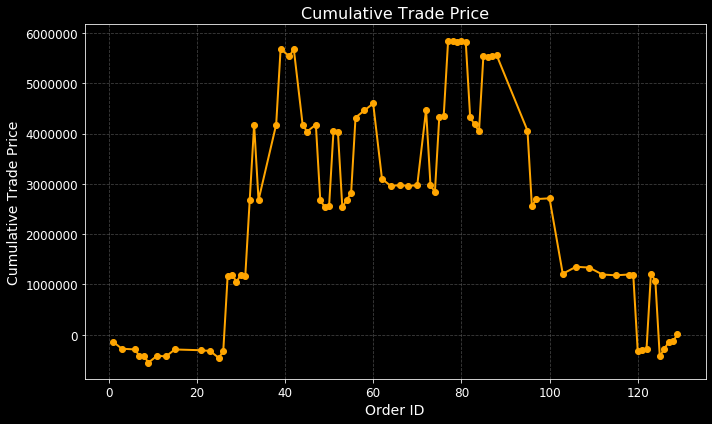

In [201]:
#x = np.arange(1, len(df[df['action'] == 'filled']) + 1) - можно проставить диапазон [1;82] по оси X
x = df[df['action'] == 'filled']['orderId']
y = df[df['action'] == 'filled']['tradePx'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='orange', linewidth=2)
plt.title('Cumulative Trade Price', fontsize=16, color='white') 
plt.xlabel('Order ID', fontsize=14, color='white') 
plt.ylabel('Cumulative Trade Price', fontsize=14, color='white') 
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white') 
plt.grid(True, linestyle='--', alpha=0.5, color='gray') 
plt.tight_layout()
plt.show()